In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X , y  = make_circles(n_samples=100 , noise = 0.1 , random_state=1)

AttributeError: module 'matplotlib' has no attribute 'show'

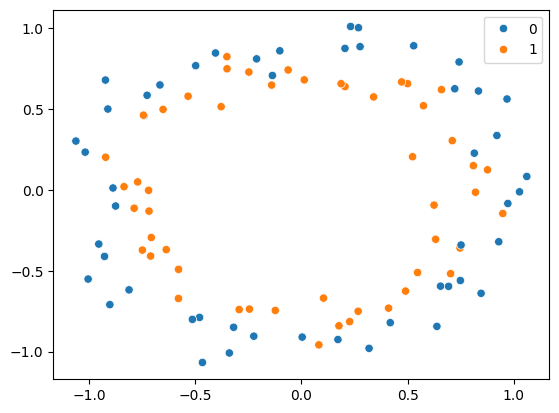

In [4]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

In [5]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=2)

In [6]:
model = Sequential()

model.add(Dense(256 , input_dim=2 , activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=600 , verbose=0)

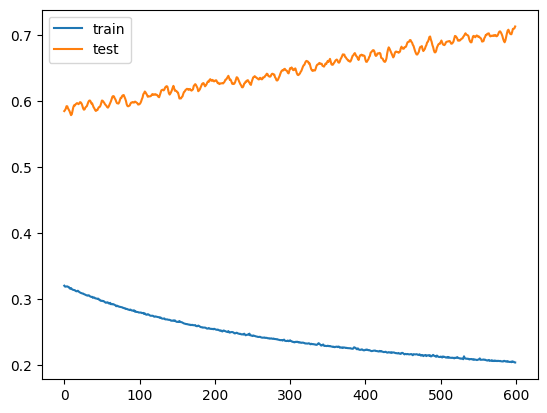

In [16]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'] , label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


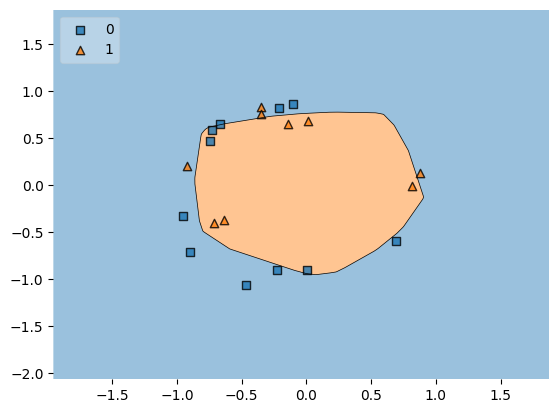

In [26]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()


Early Stopping

In [28]:
model = Sequential()

model.add(Dense(256 , input_dim=2 , activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [33]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=600  , callbacks=[callback])

Epoch 1/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5688 - loss: 0.6778 - val_accuracy: 0.4000 - val_loss: 0.7114
Epoch 2/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6273 - loss: 0.6665 - val_accuracy: 0.4000 - val_loss: 0.7116
Epoch 3/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5805 - loss: 0.6747 - val_accuracy: 0.4000 - val_loss: 0.7110
Epoch 4/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6125 - loss: 0.6730 - val_accuracy: 0.4500 - val_loss: 0.7109
Epoch 5/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6125 - loss: 0.6675 - val_accuracy: 0.4000 - val_loss: 0.7112
Epoch 6/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5594 - loss: 0.6750 - val_accuracy: 0.4000 - val_loss: 0.7110
Epoch 7/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5852 - loss: 0.6771 - val_accuracy: 0.4000 - val_loss: 0.7119
Epoch 8/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5492 - loss: 0.6759 - val_accuracy: 0.4000 - val_loss:

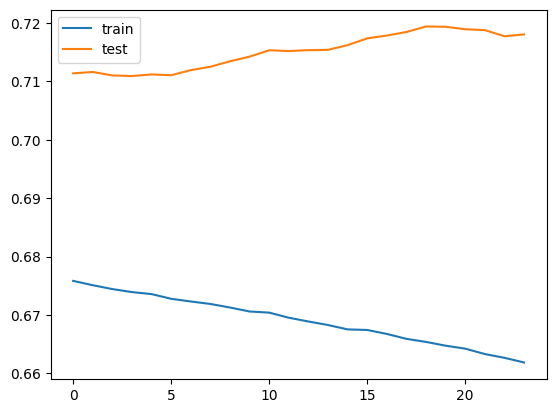

In [34]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'] , label='test')
plt.legend()
plt.show()

In [ ]:
# results are not good yet but just understand the conceppt